In [1]:
import pandas as pd

# Load the dataset
dataset = pd.read_csv('stock-data.csv')

# Extract the 'open' column (assuming it is the 4th column)
open_value = dataset.iloc[:, 3]

# Remove rows where 'open_value' is missing
open_value = open_value.dropna()

# Convert into a column vector
open_value = open_value.values.reshape(-1, 1)

# Print the first 5 values and the shape
print(open_value[:5])
print(open_value.shape)

[[3.2912271 ]
 [3.30460596]
 [3.30460596]
 [3.30460596]
 [3.38488007]]
(11174, 1)


In [2]:
# Remove the first 4000 values
open_value = open_value[4000:]

# Print the first 5 values and the shape
print(open_value[:5])
print(open_value.shape)

[[41.25 ]
 [41.875]
 [42.125]
 [41.875]
 [42.375]]
(7174, 1)


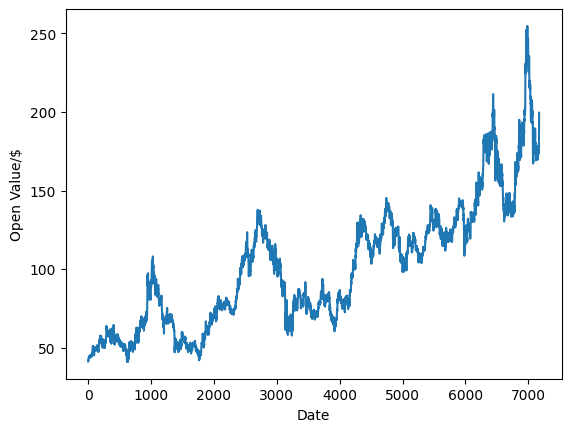

In [3]:
from matplotlib import pyplot as plt

plt.plot(open_value)
plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.show()  

In [4]:
from sklearn.preprocessing import MinMaxScaler  


scaler=MinMaxScaler(feature_range=(0,1))
scaled_open_value=scaler.fit_transform(open_value)

print(open_value[:5])
print(scaled_open_value[:5])

[[41.25 ]
 [41.875]
 [42.125]
 [41.875]
 [42.375]]
[[0.00146142]
 [0.00438427]
 [0.00555341]
 [0.00438427]
 [0.00672255]]


In [5]:



data = []
target = []

for i in range(100, open_value.shape[0] - 5):  # Subtract 5 to ensure we have enough data for target
    data.append(scaled_open_value[i - 100:i])  # 100 previous values
    target.append(scaled_open_value[i:i + 5])  # The next 5 values

In [6]:
import numpy as np

data_np=np.array(data)
target_np=np.array(target)

print(data_np.shape)
print(target_np.shape)

(7069, 100, 1)
(7069, 5, 1)


In [7]:
data=data_np
target=target_np

In [8]:
train_data=data[:6000]
train_target=target[:6000]

test_data=data[6000:]
test_target=target[6000:]

print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(6000, 100, 1)
(1069, 100, 1)
(6000, 5, 1)
(1069, 5, 1)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model=Sequential()

model.add(LSTM(units=126,return_sequences=True,input_shape=(100,1)))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=40,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(5,activation='linear'))

model.compile(loss='mse',optimizer='adam')

c:\Users\USER\Music\DeepL\myenvdeep\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
history=model.fit(train_data,train_target,epochs=50,validation_data=(test_data,test_target))

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 23s 100ms/step - loss: 0.0091 - val_loss: 0.0037
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 18s 98ms/step - loss: 0.0017 - val_loss: 0.0040
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 22s 119ms/step - loss: 0.0013 - val_loss: 0.0024
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 23s 120ms/step - loss: 9.9340e-04 - val_loss: 0.0019
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 22s 118ms/step - loss: 8.1432e-04 - val_loss: 0.0029
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 22s 119ms/step - loss: 7.3496e-04 - val_loss: 0.0017
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 22s 118ms/step - loss: 6.3939e-04 - val_loss: 0.0025
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 22s 119ms/step - loss: 5.6934e-04 - val_loss: 0.0020
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 22s 118ms/step - loss: 5.8743e-04 - val_loss: 0.0017
Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 23s 120ms/step - loss: 4.9184e-04 - val_loss: 0.0013
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 38s 204ms/step - loss: 4.8205e-04 - val_l

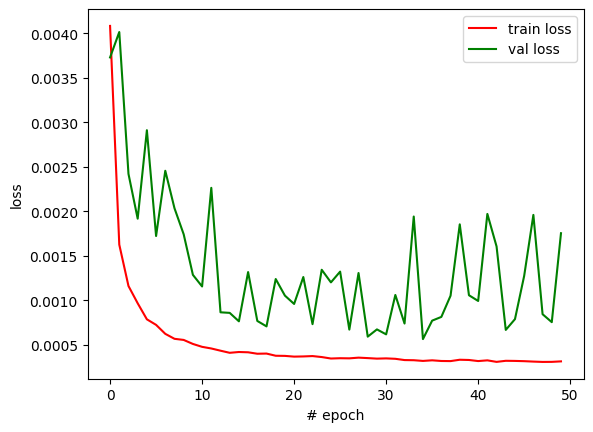

In [12]:
plt.plot(history.history['loss'],'r',label='train loss')
plt.plot(history.history['val_loss'],'g',label='val loss')
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Predict the values using the trained model
predictions = model.predict(test_data)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_target, predictions))

print(f"RMSE: {rmse}")

In [13]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Predict the values using the trained model
predictions = model.predict(test_data)

# Flatten the predictions and test_target to 1D arrays
predictions = predictions.reshape(-1)
test_target = test_target.reshape(-1)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_target, predictions))
print(f"RMSE: {rmse}")

# 2. Directional Accuracy
# Compute the direction of actual and predicted values
actual_direction = np.sign(np.diff(test_target))  # Direction of actual values
predicted_direction = np.sign(np.diff(predictions))  # Direction of predicted values

# Directional accuracy is the percentage of times the predicted direction matches the actual direction
directional_accuracy = np.mean(actual_direction == predicted_direction) * 100
print(f"Directional Accuracy: {directional_accuracy}%")


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
RMSE: 0.041872888343811414
Directional Accuracy: 48.74625748502994%


In [ ]:
test_x_range=np.arange(10000,11074,5)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.plot(test_x_range,result,'g',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()

In [ ]:
plt.plot(test_target,'b',label='test')
plt.plot(result,'g',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()